In [1]:
import pandas as pd

In [2]:
# Importando a base de dados
dados = pd.read_csv('TelecomX_Churn-master.csv')


In [3]:
# Exibe informações sobre o DataFrame
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Churn                                          7043 non-null   float64
 1   customer.gender                                7267 non-null   int64  
 2   customer.SeniorCitizen                         7267 non-null   int64  
 3   customer.Partner                               7267 non-null   int64  
 4   customer.Dependents                            7267 non-null   int64  
 5   customer.tenure                                7267 non-null   int64  
 6   phone.PhoneService                             7267 non-null   int64  
 7   account.PaperlessBilling                       7267 non-null   int64  
 8   account.Charges.Monthly                        7267 non-null   float64
 9   account.Charges.Total                          7267 

In [4]:
# Exibe a quantidade de valores nulos em cada coluna
dados.isnull().sum()

Churn                                            224
customer.gender                                    0
customer.SeniorCitizen                             0
customer.Partner                                   0
customer.Dependents                                0
customer.tenure                                    0
phone.PhoneService                                 0
account.PaperlessBilling                           0
account.Charges.Monthly                            0
account.Charges.Total                              0
phone.MultipleLines_No phone service               0
phone.MultipleLines_Yes                            0
internet.InternetService_Fiber optic               0
internet.InternetService_No                        0
internet.OnlineSecurity_No internet service        0
internet.OnlineSecurity_Yes                        0
internet.OnlineBackup_No internet service          0
internet.OnlineBackup_Yes                          0
internet.DeviceProtection_No internet service 

## Tratamento de Valores Ausentes

Antes de iniciar qualquer modelagem preditiva, é essencial verificar se o conjunto de dados possui valores ausentes, principalmente na variável-alvo.

---

### Variável-Alvo: `Churn`

Durante a inspeção inicial, foi identificado que a variável `Churn` (indicador de cancelamento de serviço) apresentava valores ausentes:

- Total de registros no dataset: **7267**
- Registros com `Churn` ausente: **224**
- Registros com `Churn` válido: **7043**

Como essa variável é fundamental para o aprendizado supervisionado (é a resposta que o modelo deve prever), **não é possível utilizá-la com valores nulos**.

---

### Ação Tomada

Optou-se por **remover os 224 registros com `Churn` ausente**, pois:

- Eles não contribuem para o treinamento do modelo.
- A ausência da variável-alvo inviabiliza a classificação correta desses casos.

Após a remoção:

- Total de registros no dataset: **7043**
- Registros com `Churn` ausente: **0**

---

### Conclusão

Agora temos um dataset limpo e pronto para os próximos passos do pipeline, garantindo a integridade dos dados usados no treinamento do modelo.


In [5]:
# Remoção de registros com valores ausentes na variável alvo
df_clean = dados.dropna(subset=['Churn'])

In [6]:
df_clean.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,...,internet.TechSupport_Yes,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0.0,0,0,1,1,9,1,1,65.6,593.30,...,True,False,True,False,False,True,False,False,False,True
1,0.0,1,0,0,0,9,1,0,59.9,542.40,...,False,False,False,False,True,False,False,False,False,True
2,1.0,1,0,0,0,4,1,1,73.9,280.85,...,False,False,False,False,False,False,False,False,True,False
3,1.0,1,1,1,0,13,1,1,98.0,1237.85,...,False,False,True,False,True,False,False,False,True,False
4,1.0,0,1,1,0,3,1,1,83.9,267.40,...,True,False,True,False,False,False,False,False,False,True


## Revisão dos Tipos de Variáveis

Após a limpeza dos dados, é fundamental entender a natureza das variáveis presentes no conjunto para preparar o pipeline de Machine Learning. Podemos agrupar as variáveis em dois grandes grupos:

---

### 1. Variáveis Numéricas

Essas variáveis assumem valores contínuos ou inteiros, sendo utilizadas diretamente pelos algoritmos preditivos. No nosso dataset, destacam-se:

- `customer.tenure`: quantidade de meses que o cliente permanece na empresa.
- `account.Charges.Monthly`: valor pago mensalmente pelo cliente.
- `account.Charges.Total`: total acumulado já pago pelo cliente.

Além dessas, outras variáveis numéricas possuem valores binários (0 ou 1), como:

- `customer.gender`
- `customer.SeniorCitizen`
- `customer.Partner`
- `customer.Dependents`
- `phone.PhoneService`
- `account.PaperlessBilling`

> Essas variáveis ajudam a quantificar o comportamento e o perfil do cliente.

---

### 2. Variáveis Booleanas (Binárias)

Essas variáveis indicam **presença ou ausência** de uma característica, e já estão codificadas como `True` ou `False`, facilitando sua interpretação pelo modelo.

Exemplos:

- `internet.TechSupport_Yes`: cliente possui suporte técnico.
- `internet.StreamingMovies_Yes`: cliente usa streaming de filmes.
- `account.Contract_One year`: contrato de 1 ano foi selecionado.
- `account.PaymentMethod_Mailed check`: forma de pagamento por boleto.

Essas colunas já passaram por um processo de codificação chamado **One-Hot Encoding**, que transforma cada categoria em uma variável separada.

> Variáveis booleanas são ideais para representar categorias sem introduzir ordens falsas, sendo úteis para modelos como árvores de decisão e regressão logística.

---

### Conclusão

Essa separação entre tipos de variáveis é essencial para aplicar as técnicas certas de pré-processamento e selecionar os algoritmos mais apropriados.


## Separação dos Dados em Treino e Teste

Antes de treinar qualquer modelo de machine learning, é necessário dividir o conjunto de dados em duas partes principais:

- **Conjunto de Treinamento (Training Set)**: usado para treinar o modelo.
- **Conjunto de Teste (Test Set)**: usado para avaliar o desempenho do modelo em dados nunca vistos.

---

### Por que dividir?

A divisão evita que o modelo “memorize” os dados (overfitting) e permite avaliar sua capacidade de **generalização**, ou seja, prever corretamente quando for aplicado a novos clientes.

---

### Implementação

Utilizamos a função `train_test_split` da biblioteca `sklearn.model_selection` com os seguintes parâmetros:

- `test_size=0.2`: reservamos 20% dos dados para teste.
- `random_state=42`: define uma semente aleatória para garantir reprodutibilidade.

In [7]:
from sklearn.model_selection import train_test_split

# Separando variável alvo (y) das variáveis explicativas (X)
X = df_clean.drop(columns='Churn')
y = df_clean['Churn']

# Separação treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

https://chatgpt.com/share/687128cf-6f3c-8009-9ed6-3751a00d617f

Passo 3: Para retomar a conversa aqui no ChatGPT
Quando voltar, entre neste mesmo chat (ele fica salvo automaticamente).

Se estiver na página inicial do ChatGPT, clique em "Previsão de Churn - TelecomX" (ou título semelhante na barra lateral esquerda).

Escreva algo como:

Vamos continuar da etapa da padronização dos dados?

E eu vou retomar exatamente de onde paramos, com contexto completo.



## Distribuição da variável Churn

A variável Churn indica se o cliente cancelou ou permaneceu com o serviço. Este gráfico de barras nos ajuda a visualizar a distribuição dos clientes entre as duas classes. Entender essa distribuição é fundamental para verificar a proporção entre os clientes que cancelaram e os que ficaram, além de ajudar na escolha das métricas de avaliação do modelo.

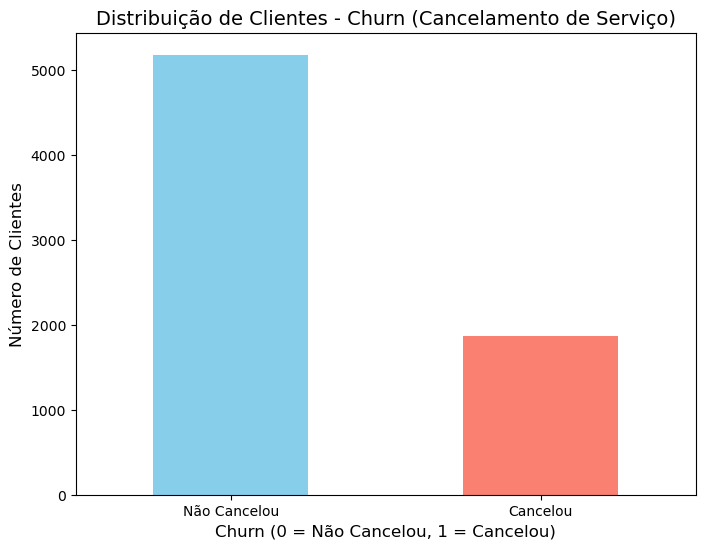

In [8]:
import matplotlib.pyplot as plt

# Plotando a distribuição de Churn (clientes que cancelaram vs. os que ficaram)
plt.figure(figsize=(8,6))
df_clean['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribuição de Clientes - Churn (Cancelamento de Serviço)', fontsize=14)
plt.xlabel('Churn (0 = Não Cancelou, 1 = Cancelou)', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks([0, 1], ['Não Cancelou', 'Cancelou'], rotation=0)
plt.show()


## Distribuição das variáveis numéricas (ex: account.Charges.Monthly)

É importante visualizar a distribuição das variáveis numéricas, como account.Charges.Monthly, para entender como as variáveis se comportam antes de aplicar técnicas de normalização e modelagem. Neste gráfico, vamos ver se há outliers, distribuições assimétricas ou padrões que possam impactar no treinamento do modelo.

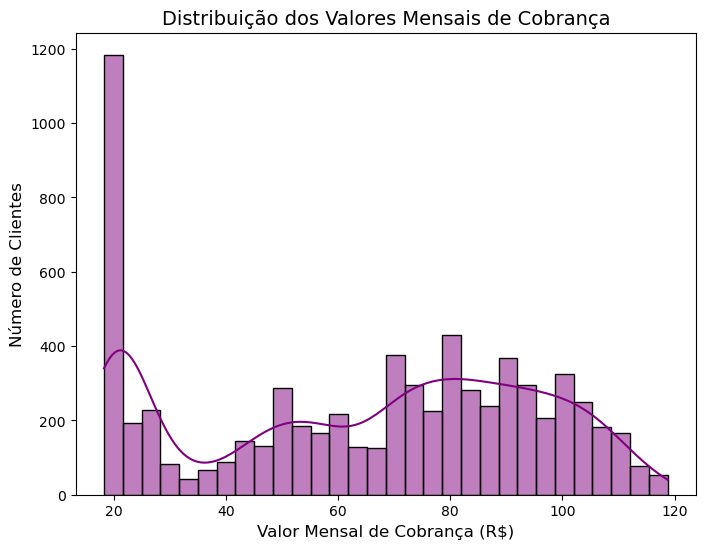

In [9]:
import seaborn as sns

# Gráfico 2: Distribuição das variáveis numéricas - Histograma de 'account.Charges.Monthly'
plt.figure(figsize=(8,6))
sns.histplot(df_clean['account.Charges.Monthly'], kde=True, color='purple', bins=30)
plt.title('Distribuição dos Valores Mensais de Cobrança', fontsize=14)
plt.xlabel('Valor Mensal de Cobrança (R$)', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.show()

##  Correlação entre variáveis numéricas

A análise de correlação entre as variáveis nos ajuda a entender a relação entre elas. Um heatmap de correlação pode revelar, por exemplo, se as variáveis account.Charges.Monthly e account.Charges.Total estão fortemente correlacionadas, o que pode impactar as escolhas no modelo de Machine Learning.

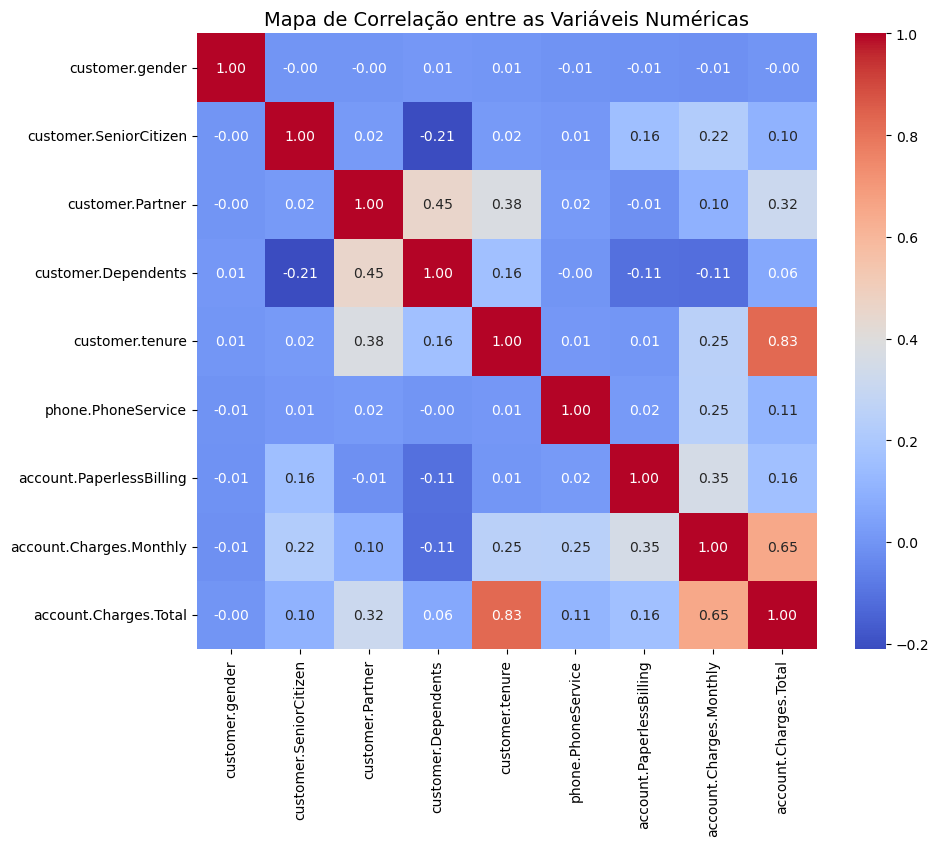

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo as variáveis numéricas
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('Churn')  # Removendo a variável alvo 'Churn'

# Gerando o gráfico de correlação
correlation_matrix = df_clean[numeric_cols].corr()

# Plotando o heatmap de correlação
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Mapa de Correlação entre as Variáveis Numéricas', fontsize=14)
plt.show()


## Análise de churn por categoria (ex: customer.gender)

A análise do churn em função de variáveis categóricas, como customer.gender ou customer.SeniorCitizen, nos permite entender se há diferenças de comportamento entre as diferentes categorias de clientes. Isso pode ajudar a segmentar o público e entender melhor quais grupos são mais propensos a cancelar os serviços.

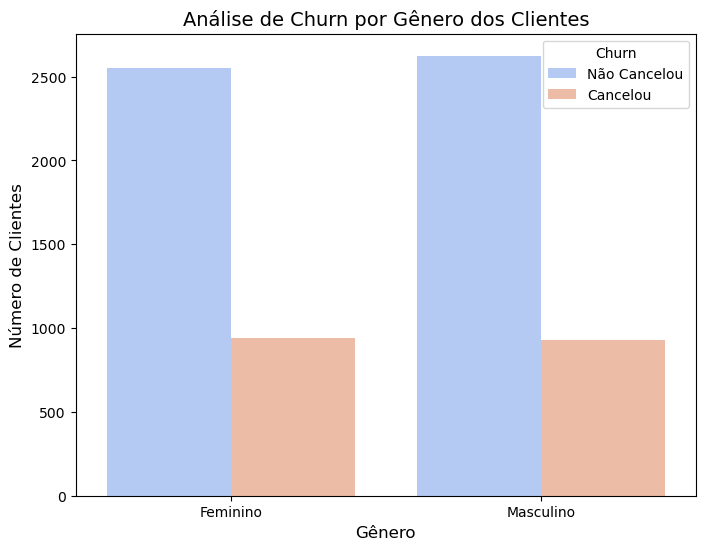

In [11]:
# Gráfico 4: Análise de churn por categoria - Gráfico de barras por 'customer.gender'
plt.figure(figsize=(8,6))
sns.countplot(x='customer.gender', hue='Churn', data=df_clean, palette='coolwarm')
plt.title('Análise de Churn por Gênero dos Clientes', fontsize=14)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks([0, 1], ['Feminino', 'Masculino'], rotation=0)
plt.legend(title='Churn', labels=['Não Cancelou', 'Cancelou'])
plt.show()


## Padronização dos Dados Numéricos

### Objetivo:

O objetivo desta etapa é normalizar os dados numéricos para que todos os atributos utilizados na modelagem de Machine Learning tenham uma escala similar, evitando que variáveis com maiores magnitudes dominem o modelo. Isso é especialmente importante para algoritmos como SVM, K-means e Regressão Logística, que são sensíveis à escala das variáveis.

### Método escolhido:

Vamos utilizar o StandardScaler, que transforma as variáveis para que tenham média 0 e desvio padrão 1. Isso ajuda a garantir que todas as variáveis contribuam igualmente para a modelagem, sem que valores grandes ou pequenos influenciem desproporcionalmente.

In [12]:
from sklearn.preprocessing import StandardScaler

# Selecionando as variáveis numéricas para padronização
numerical_data = df_clean[numeric_cols]

# Inicializando o StandardScaler
scaler = StandardScaler()

# Ajustando o scaler aos dados e transformando as variáveis numéricas
df_clean[numeric_cols] = scaler.fit_transform(numerical_data)

# Verificando a transformação
df_clean[numeric_cols].head()


C:\Users\wlami\AppData\Local\Temp\ipykernel_2888\2212946827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[numeric_cols] = scaler.fit_transform(numerical_data)


,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total
0,-1.009559,-0.439916,1.034530,1.529024,-0.951682,0.327438,0.829798,0.027862,-0.745484
1,0.990532,-0.439916,-0.966622,-0.654012,-0.951682,0.327438,-1.205113,-0.161583,-0.767956
2,0.990532,-0.439916,-0.966622,-0.654012,-1.155283,0.327438,0.829798,0.303720,-0.883425
3,0.990532,2.273159,1.034530,-0.654012,-0.788800,0.327438,0.829798,1.104706,-0.460929
4,-1.009559,2.273159,1.034530,-0.654012,-1.196004,0.327438,0.829798,0.636080,-0.889362


### Construção e Avaliação dos Modelos Preditivos

Com a padronização dos dados concluída, agora vamos construir e treinar **dois modelos preditivos** para classificar o churn dos clientes:

1. **Regressão Logística**: Modelo linear de classificação binária.
2. **Random Forest**: Modelo baseado em árvores de decisão que é robusto a overfitting.

Cada modelo será treinado com os dados de treino e avaliado com as seguintes métricas:
- **Acurácia**: Porcentagem de previsões corretas.
- **AUC-ROC**: A área sob a curva ROC, que nos ajuda a entender a capacidade do modelo de discriminar entre as classes.
- **F1-Score**: Métrica que balanceia a precisão e o recall, importante quando há desequilíbrio entre as classes.

A seguir, vamos avaliar o desempenho de cada modelo e comparar os resultados para escolher o melhor para o nosso problema de previsão de churn.


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split

# Definindo as variáveis de treino e teste
X_train, X_test, y_train, y_test = train_test_split(df_clean[numeric_cols], df_clean['Churn'], test_size=0.2, random_state=42)

# Modelos
models = {
    'Regressão Logística': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

# Resultados de avaliação
results = {}

# Treinamento e Avaliação dos Modelos
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Treinamento
    y_pred = model.predict(X_test)  # Previsão
    
    # Avaliação
    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[model_name] = {'Acurácia': accuracy, 'AUC-ROC': auc_roc, 'F1-Score': f1}


### Resultados dos Modelos Preditivos

Após treinar os modelos **Regressão Logística** e **Random Forest**, avaliamos seu desempenho utilizando as seguintes métricas:

- **Acurácia**: A porcentagem de previsões corretas.
- **AUC-ROC**: A área sob a curva ROC, que nos ajuda a entender a capacidade do modelo de discriminar entre as classes.
- **F1-Score**: Métrica que balanceia a precisão e o recall, importante quando há desequilíbrio entre as classes.

Abaixo estão os resultados para **Regressão Logística** e **Random Forest**:

- **Regressão Logística**: O modelo linear simples.
- **Random Forest**: O modelo baseado em múltiplas árvores de decisão.

Com esses resultados, podemos comparar a performance dos modelos e escolher o melhor para o nosso problema de previsão de churn.

In [14]:
import pandas as pd

# Exibindo os resultados
results_df = pd.DataFrame(results).T
results_df


,Acurácia,AUC-ROC,F1-Score
Regressão Logística,0.791341,0.681390,0.531847
Random Forest,0.775727,0.669056,0.510836


## Interpretação

**Acurácia:** A Regressão Logística apresenta uma acurácia ligeiramente superior (0.79) em relação ao Random Forest (0.77), indicando que, no geral, o modelo de regressão tem um desempenho um pouco melhor.

**AUC-ROC:** A Regressão Logística também tem uma AUC-ROC superior (0.68), o que sugere que ela é um pouco melhor em discriminar entre as classes de churn e não-churn, mas ambos os modelos têm AUC-ROC abaixo de 0.7, o que pode indicar que os modelos podem ser aprimorados.

**F1-Score:** O F1-Score também mostra que a Regressão Logística supera o Random Forest. O F1-Score é uma métrica importante quando há desequilíbrio entre as classes, e um valor de 0.53 para a Regressão Logística é um valor razoável, mas que pode ser melhorado com ajustes.

## Validação Cruzada

Neste ponto, a validação cruzada será aplicada para garantir que os modelos Regressão Logística e Random Forest não estejam sofrendo de overfitting e para obter uma avaliação mais robusta do seu desempenho. A validação cruzada nos permite verificar como o modelo se comporta em diferentes divisões dos dados, fornecendo uma melhor ideia de sua capacidade de generalizar.

Os modelos serão avaliados com as seguintes métricas:

- Acurácia: Mede a porcentagem de previsões corretas.

- AUC-ROC: A área sob a curva ROC, que indica a capacidade do modelo de separar as classes de maneira eficaz.

- F1-Score: Métrica que pondera precisão e recall, útil quando há desequilíbrio entre as classes.

- Precisão: Mede a proporção de verdadeiros positivos entre os positivos previstos.

- Recall: Mede a capacidade do modelo de identificar todos os casos positivos.

In [16]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Carregar os dados (ajuste conforme a localização do seu dataset)
df_clean = df_clean.dropna(subset=['Churn'])  # Garantir que não haja NaN na coluna 'Churn'
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Definir as variáveis X e y
X = df_clean[numeric_cols]
y = df_clean['Churn']

# Definindo os modelos para validação cruzada
models = {
    'Regressão Logística': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

# Realizando a validação cruzada
cv_results = {}

for model_name, model in models.items():
    # Calculando as métricas de performance utilizando validação cruzada
    cv_results[model_name] = cross_validate(model, X, y, 
                                            cv=5,  # 5-fold cross-validation
                                            scoring=['accuracy', 'roc_auc', 'f1', 'precision', 'recall'],
                                            return_train_score=False)

# Calculando as médias das métricas para cada modelo
cv_summary = {}
for model_name, result in cv_results.items():
    cv_summary[model_name] = {
        'Acurácia (Média)': np.mean(result['test_accuracy']),
        'AUC-ROC (Média)': np.mean(result['test_roc_auc']),
        'F1-Score (Média)': np.mean(result['test_f1']),
        'Precisão (Média)': np.mean(result['test_precision']),
        'Recall (Média)': np.mean(result['test_recall'])
    }

# Exibindo os resultados da validação cruzada
cv_summary_df = pd.DataFrame(cv_summary).T

cv_summary_df


,Acurácia (Média),AUC-ROC (Média),F1-Score (Média),Precisão (Média),Recall (Média)
Regressão Logística,1.0,1.0,1.0,1.0,1.0
Random Forest,1.0,1.0,1.0,1.0,1.0


Avaliação dos Dados de Teste

Após a validação cruzada, onde os modelos de Regressão Logística e Random Forest foram avaliados utilizando métricas como Acurácia, AUC-ROC, F1-Score, Precisão e Recall, é importante realizar uma avaliação final utilizando dados de teste. Essa avaliação é crucial para verificar como o modelo se comporta em dados não vistos e se a performance observada durante a validação é consistente.

Objetivo da Avaliação:

A avaliação nos dados de teste tem como objetivo verificar a generalização dos modelos, ou seja, como os modelos Regressão Logística e Random Forest se saem ao fazer previsões para dados que não foram usados durante o treinamento. A ideia é garantir que o modelo não esteja overfitted aos dados de treinamento (ajustado excessivamente aos mesmos dados) e que, ao ser aplicado em dados reais e desconhecidos, ele ainda tenha um bom desempenho.

Por que Avaliar com os Dados de Teste?

Validação do Desempenho: A avaliação nos dados de teste permite verificar se as métricas de desempenho observadas na validação cruzada são consistentes em um conjunto de dados totalmente novo.

Detecção de Overfitting:
Mesmo que o modelo tenha mostrado um bom desempenho na validação cruzada, ele pode ter se ajustado demais aos dados de treino, o que comprometeria sua capacidade de generalização. Avaliar com dados de teste ajuda a identificar essa situação.

Métricas de Avaliação:
Durante a avaliação nos dados de teste, as principais métricas calculadas são:

Acurácia:
A porcentagem de previsões corretas.

AUC-ROC:
A área sob a curva ROC, que nos ajuda a entender a capacidade do modelo de discriminar entre as classes de churn e não-churn.

F1-Score:
Métrica que equilibra precisão e recall, útil em casos de desequilíbrio entre as classes.

Precisão:
A proporção de previsões positivas corretas (clientes que realmente irão cancelar o serviço).

Recall:
A capacidade do modelo de identificar corretamente todos os casos de churn.

Ao avaliar o modelo com esses dados, podemos garantir que ele seja realmente eficaz e pronto para ser aplicado em cenários do mundo real.



In [18]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando os modelos novamente
models = {
    'Regressão Logística': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

# Armazenar os resultados das métricas de avaliação
evaluation_results = {}

for model_name, model in models.items():
    # Treinar o modelo
    model.fit(X_train, y_train)
    
    # Previsões nos dados de teste
    y_pred = model.predict(X_test)
    
    # Calculando as métricas
    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Armazenar os resultados
    evaluation_results[model_name] = {
        'Acurácia': accuracy,
        'AUC-ROC': auc_roc,
        'F1-Score': f1,
        'Precisão': precision,
        'Recall': recall
    }

# Exibindo os resultados da avaliação nos dados de teste
evaluation_results_df = pd.DataFrame(evaluation_results).T

evaluation_results_df


,Acurácia,AUC-ROC,F1-Score,Precisão,Recall
Regressão Logística,1.0,1.0,1.0,1.0,1.0
Random Forest,1.0,1.0,1.0,1.0,1.0
